In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

In [3]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'tidal_heating_test/'
s = pynbody.load(datadir+simulation+'snapdir_101/snapshot_101')

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [4]:
data = np.loadtxt('oneclustershocks_new.txt')

In [5]:
time = data[:,0]
tensor = data[:,1:-4]
tidal_heating = data[:,-4]
shock_duration = data[:,-3]
Awj = data[:,-2]
time_since_last_shock = data[:,-1]

In [6]:
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

In [7]:
gyr = gyr = 3.15576e16 # in s
unit_time = 3.08568e19
h = 0.6777
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

In [8]:
tensor *= convert_factor[:, np.newaxis]
tidal_heating *= convert_factor

In [9]:
shock_duration *= unit_time/h /gyr
time_since_last_shock *= unit_time/h /gyr

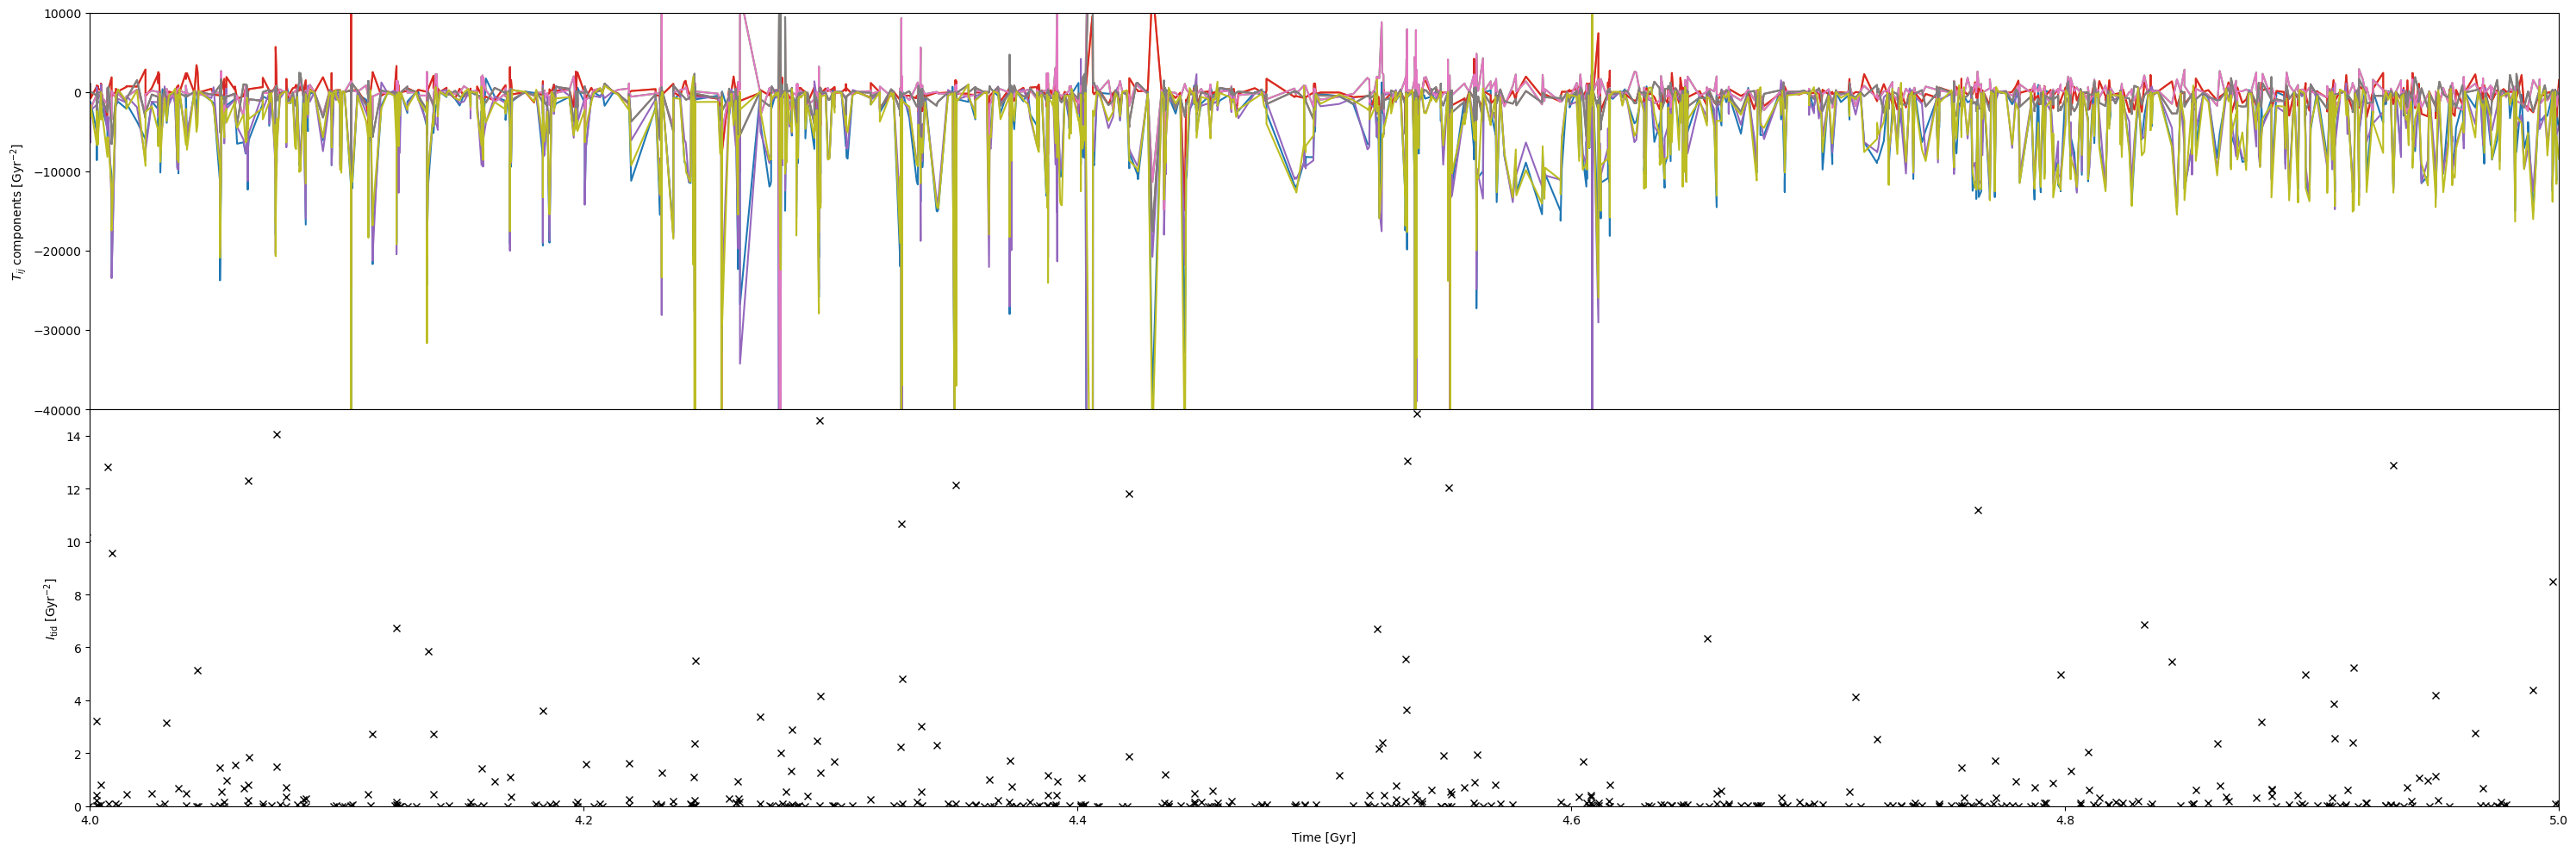

In [17]:
fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'hspace': 0}, figsize=(30,10))
for i in range(tensor.shape[1]):
    ax[0].plot(time_gyr, tensor[:,i])
ax[0].set(ylabel=r'$T_{ij}$ components [Gyr$^{-2}$]')
ax[0].set_ylim(-40000,10000)
for i,val in enumerate(tidal_heating):
    if val>0:
        ax[1].plot(time_gyr[i], val, 'x', c='k')
ax[1].set(xlabel='Time [Gyr]', ylabel=r'$I_{\rm{tid}}$ [Gyr$^{-2}$]')
ax[1].set_xlim(4,5)
ax[1].set_ylim(0,15)
plt.tight_layout()
# plt.savefig('tidal_heating_test_wcriterion.pdf')

In [9]:
shock_duration

array([0.00398967,        nan, 0.00031785, ...,        nan,        nan,
       0.00364521])

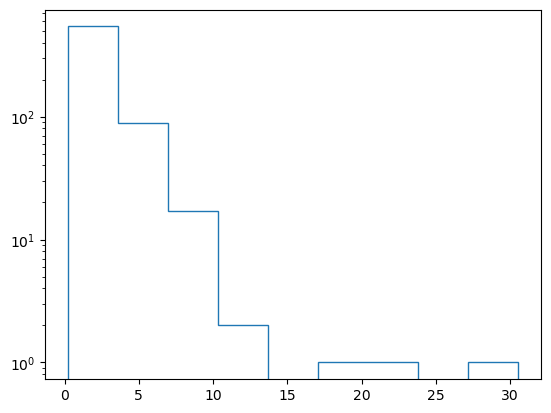

In [10]:
bins = np.linspace(shock_duration[~np.isnan(shock_duration)].min()*1e3, shock_duration[~np.isnan(shock_duration)].max()*1e3, 10)
plt.hist(shock_duration[~np.isnan(shock_duration)]*1e3, bins=bins, histtype='step')
plt.yscale('log')

In [11]:
time_since_last_shock*1e3

array([0.57401065, 0.57503072, 0.31813304, ..., 0.78127449, 0.78127449,
       0.78220727])

Text(0.5, 0, 'Weinberg correction')

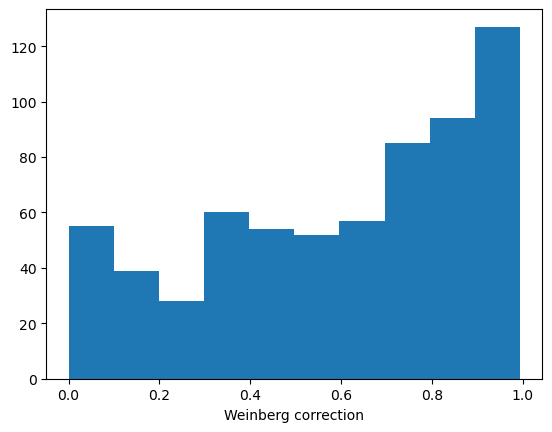

In [12]:
plt.hist(Awj[~np.isnan(Awj)], bins=10)
plt.xlabel('Weinberg correction')